In [39]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale 
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [11]:
df = pd.read_csv("/Users/raneemaj/Documents/GitHub/Use-case-7/final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [5]:
df.tail()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.0,0.0,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.0,0.0,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.0,0.0,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.0,0.0,865,0,0,0,50000,50000,4,0
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,...,0.0,0.0,1046,0,0,0,25000,25000,4,0


In [6]:
# i think it's much better like this 
#df = df.iloc[:, ::-1]

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [8]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [9]:
df.shape

(10754, 22)

In [10]:
dtale.show(df, open_browser=True)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [11]:
# it is Transfermarkt which it a reliable site in this field 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [12]:
# it's up-to-date for our usecase 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [13]:
# it is consistent among other sources 

In [14]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [28]:
df.head(3)


,player,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,/david-de-gea/profil/spieler/59377,David de Gea,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,/jack-butland/profil/spieler/128899,Jack Butland,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,/tom-heaton/profil/spieler/34130,Tom Heaton,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
df = df.drop('player', axis=1)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [16]:
df.duplicated().sum()

0

In [17]:
# not nedded 

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [18]:
#Display number missing values per column
df.isna().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [19]:
# go to clean them 
# not needed 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [20]:
# check columns types 

# already checked above 

In [21]:
df['height'] = df['height'].astype('int')
df['age'] = df['age'].astype('int')

In [22]:
def detect(df):

    outliers = {}
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            
           
            IQR = Q3 - Q1
            
          
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
    
    return outliers

outliers = detect(df)

for col, values in outliers.items():
    if values:
        print(f"Outliers in '{col}' column: {values}")

Outliers in 'height' column: [202, 206, 206, 202, 160, 204, 160, 160, 202, 160, 202, 160, 202, 160, 160, 156, 160, 160, 159, 160, 160, 160, 160, 202, 160, 160]
Outliers in 'age' column: [41, 40, 40, 41, 41, 42, 40, 40, 40, 41, 42, 40, 40, 42, 40, 42, 40, 40, 42, 40, 40, 40, 40, 42, 41, 42, 40, 40, 40, 43, 40, 40, 41]
Outliers in 'goals' column: [0.528789659, 0.525730181, 0.591618735, 0.465901418, 0.453152364, 0.484186501, 0.710900474, 0.542713568, 0.431211499, 0.666476787, 0.716886664, 0.618769337, 0.625280143, 0.546489564, 0.534865293, 0.45, 0.843568197, 0.460071843, 0.464339909, 0.509461426, 0.456852792, 0.510938798, 0.507450665, 0.660252556, 0.850366371, 0.614684121, 0.641799232, 0.583541147, 0.44661191, 0.585097516, 1.118269673, 0.606180666, 0.439292251, 0.544066179, 0.46759639, 0.63622975, 0.62090739, 0.575319622, 0.471014493, 0.458199357, 0.446650124, 0.534124629, 0.538793103, 0.464654488, 0.448619632, 0.589005236, 0.562719812, 0.496209511, 0.750521195, 0.552995392, 0.500154369, 

In [23]:
def detect(df):

    outliers = {}
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            
            lower_bound = df[col].quantile(0.05)
            upper_bound = df[col].quantile(0.95)
            
            df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
    return outliers

outliers = detect(df)

for col, values in outliers.items():
    if values:
        print(f"Outliers in '{col}' column: {values}")

In [24]:
def detect(df):
    outliers = {}
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
           
            df[f"{col}_z_score"] = (df[col] - df[col].mean()) / df[col].std()
            
            
            outliers[col] = df[(df[f"{col}_z_score"] > 3) | (df[f"{col}_z_score"] < -3)][col].tolist()
    
    return outliers


outliers = detect(df)


for col, values in outliers.items():
    if values:
        print(f"Outliers in '{col}' column: {values}")

Outliers in 'height' column: [206, 206, 160, 204, 160, 160, 160, 160, 160, 160, 156, 160, 160, 159, 160, 160, 160, 160, 160, 160]
Outliers in 'age' column: [41, 41, 41, 42, 41, 42, 42, 42, 42, 42, 41, 42, 43, 41]
Outliers in 'goals' column: [0.843568197, 0.850366371, 1.118269673, 0.881153114, 1.177927131, 0.840764331, 0.91234347, 0.964974982, 1.015625, 0.894039735, 0.938442211, 1.304347826, 1.153846154, 0.963081862, 1.099236641, 1.818181818, 1.651376147, 0.97826087, 2.0, 0.940766551, 0.947368421, 1.232876712, 1.914893617, 1.0, 0.882352941, 0.927835052, 1.317073171, 0.9375, 1.119751166, 6.0, 1.14633456, 1.010682005, 1.084337349, 0.903284672, 0.833333333, 0.862196021, 0.832830416, 0.837487537, 0.861678005, 1.619537275, 0.938981979, 0.967741935, 0.936639118, 1.058823529, 0.909090909, 0.935064935, 1.171875, 0.862619808, 1.184210526, 0.97826087, 1.764705882, 1.417322835, 1.0, 0.853080569, 0.916496945, 1.011235955, 1.317073171, 0.966010733, 4.090909091, 0.935064935, 1.956521739, 1.0, 1.07142

In [25]:
#for col in df.columns:
 #   if df[col].dtype in ['int64', 'float64']:
  #      fig, ax = plt.subplots(figsize=(8, 6))
   #     df[col].plot(kind='box', ax=ax)
    #    ax.set_title(f"Boxplot of '{col}' Column")
     #   ax.set_xlabel(col)
      #  ax.set_ylabel("Value")
       # plt.show(block=False)

#plt.show()

In [26]:
# go to delete ouliers
# done above

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

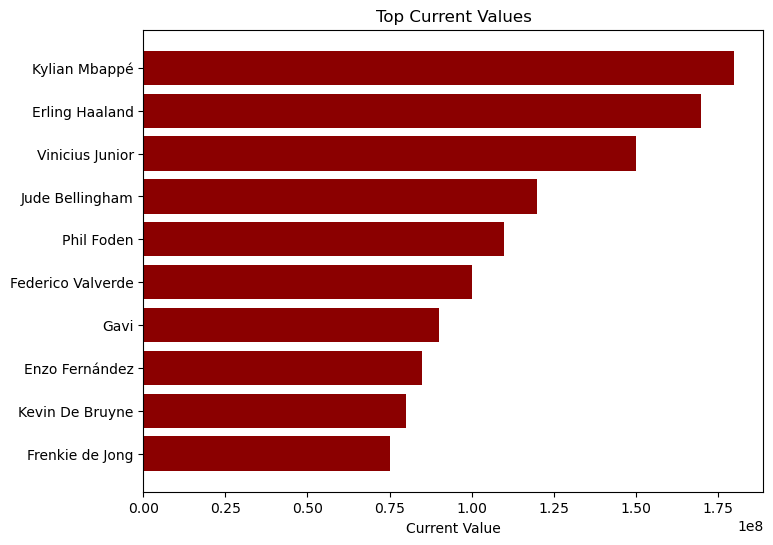

In [27]:
players = df[['name', 'team', 'current_value']]
best_players = players.sort_values(by='current_value', ascending=False).drop_duplicates('current_value')

top_10 = best_players.head(10)

plt.figure(figsize=(8, 6))
plt.barh(top_10['name'], top_10['current_value'], color='darkred')
plt.xlabel('Current Value')
plt.title('Top Current Values')
plt.gca().invert_yaxis()
plt.show()

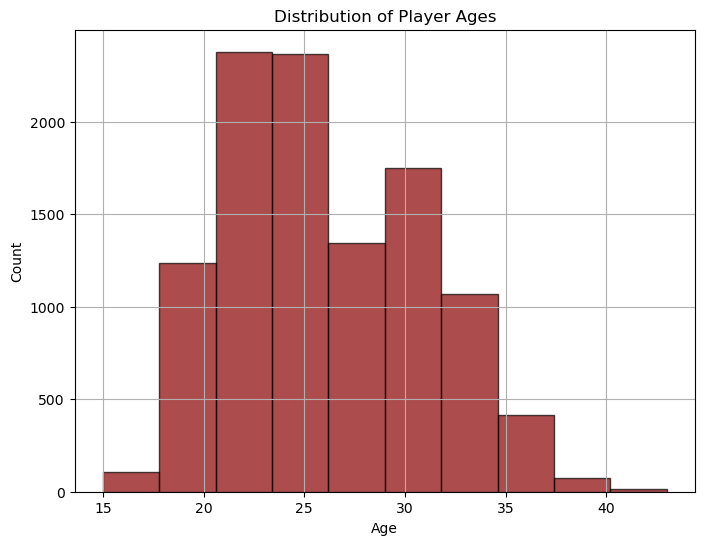

In [28]:
ages = df['age']

plt.figure(figsize=(8, 6))
plt.hist(ages, bins=10, edgecolor='black', facecolor='darkred', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Player Ages')

plt.grid(True)
plt.show()

<AxesSubplot: xlabel='age', ylabel='award'>

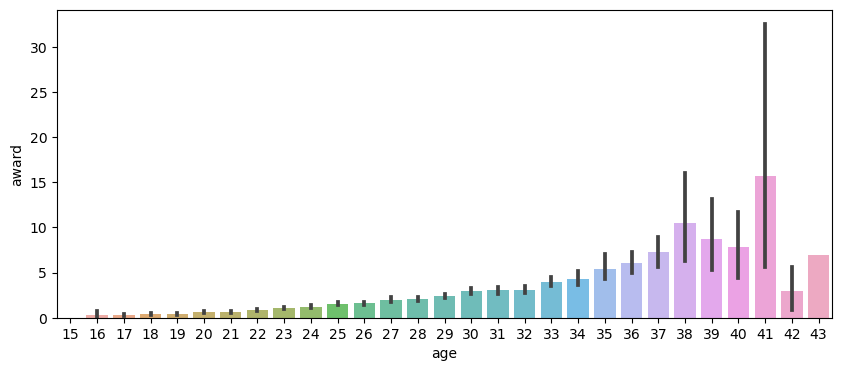

In [29]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='age', y='award', alpha=.8)

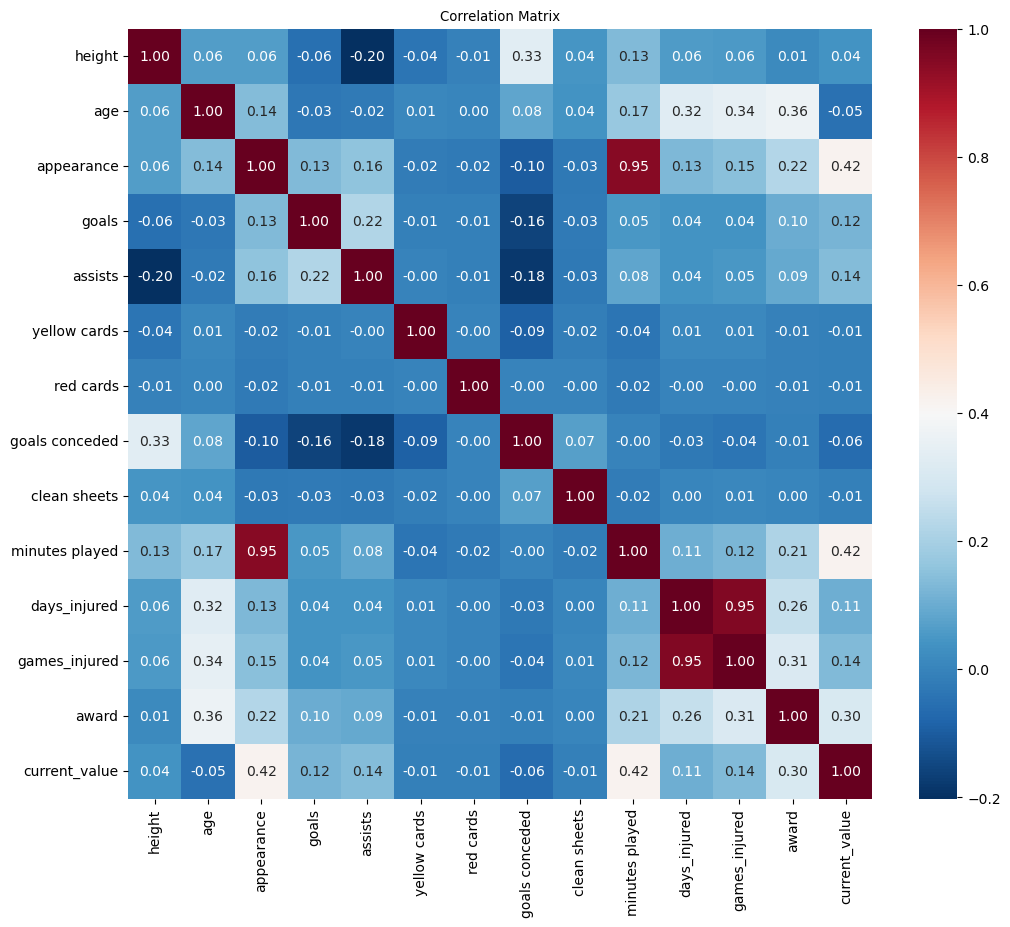

In [30]:
columns = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
            'red cards', 'goals conceded', 'clean sheets',
           'minutes played', 'days_injured', 'games_injured', 'award', 'current_value']
plt.figure(figsize=(12, 10))
sns.heatmap(df[columns].corr(), annot=True, fmt='.2f', cmap='RdBu_r', cbar=True)
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 8})
plt.title('Correlation Matrix')
plt.show()

#### 3. Feature engineering

on prepare the data for modeling, i performed the following feature engineering step:
Encoding Categorical Features: The team and position features was encoded as a numerical value using a one-hot encoding approach.
Scaling Features: The numerical features were scaled using standard scaler to ensure they are on a similar scale.

In [12]:
df = pd.get_dummies(df, columns=['team', 'position'])

In [24]:
df.head()

,player,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,/david-de-gea/profil/spieler/59377,David de Gea,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,/jack-butland/profil/spieler/128899,Jack Butland,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,/tom-heaton/profil/spieler/34130,Tom Heaton,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,/lisandro-martinez/profil/spieler/480762,Lisandro Martínez,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,/raphael-varane/profil/spieler/164770,Raphaël Varane,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


#### 4. Prepare train and test data

In [68]:

X = df[['age', 'appearance', 'goals', 'assists', 'yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'position_encoded', 'winger']]
y = df['current_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Buliding the Model

In [69]:
Linear_model = LinearRegression()

In [70]:
Linear_model.fit(X_train, y_train)

LinearRegression()

## Test the Model

In [71]:
y_pred = Linear_model.predict(X_test)

In [72]:
coeff_df = pd.DataFrame(Linear_model.coef_,X.columns,columns=['Coefficient'])
coeff_df
print(Linear_model.intercept_) 

4706963.4102250505


## Evaluating the Model 

Grid Search: i Performed a grid search to find the optimal combination of hyperparameters

In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [98]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1]
}

grid_search = GridSearchCV(Linear_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled, y)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1]},
             scoring='r2')

age: This feature has a large negative coefficient (-1464108.0524), suggesting that as the age of a player increases, it has a strong negative impact on the target variable (likely a performance metric).


appearance: This feature also has a negative coefficient (-186149.6121), meaning that the number of appearances a player has made has a negative influence on the target variable.

In [113]:
 

best_model = grid_search.best_estimator_

feature_importances = best_model.coef_


feature_names = ['age', 'appearance', 'goals', 'assists', 'yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'position_encoded', 'winger']  

 
for i, importance in enumerate(feature_importances):
    if importance != 0:
        print(f"{feature_names[i]}: {importance:.4f}")

age: -1464108.0524
appearance: -186149.6121
goals: 529635.3878
assists: 643883.0641
yellow cards: 23323.3486
red cards: 25881.8316
goals conceded: -54868.5585
clean sheets: 71532.2465
minutes played: 4017073.7751
days_injured: -1728090.9296
games_injured: 2852725.4098
position_encoded: 330683.6301
winger: -164432.4805


In [94]:
print('Best Hyperparameters:', grid_search.best_params_)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}


1. Mean Square Error

In [95]:
y_base = [y_train.mean()] * len(y_test)

In [74]:
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')


Mean Squared Error of base model: 90434700474058.52


In [96]:
mse_train = mean_squared_error(y_train, Linear_model.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 62422126212333.625
Mean Squared Error for testing: 70212687055415.92


2. Mean Absolute Error

In [76]:
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 4482422.870661328


In [77]:
mae_train = mean_absolute_error(y_train, Linear_model.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 4098853.8297456615
Mean Absolute Error for testing: 4226794.706768891


3. Root Mean Absolute Error

In [78]:
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 2117.1733208836085


In [79]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 7900767.444516616
Root Mean Squared Error for testing: 8379301.107814179


4. R Square

In [80]:
r2_train = r2_score(y_train, Linear_model.predict(X_train))
r2_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_train}')
print(f'R Square for testing: {r2_test}')

R Square for training: 0.22734935298082504
R Square for testing: 0.2236089238861787


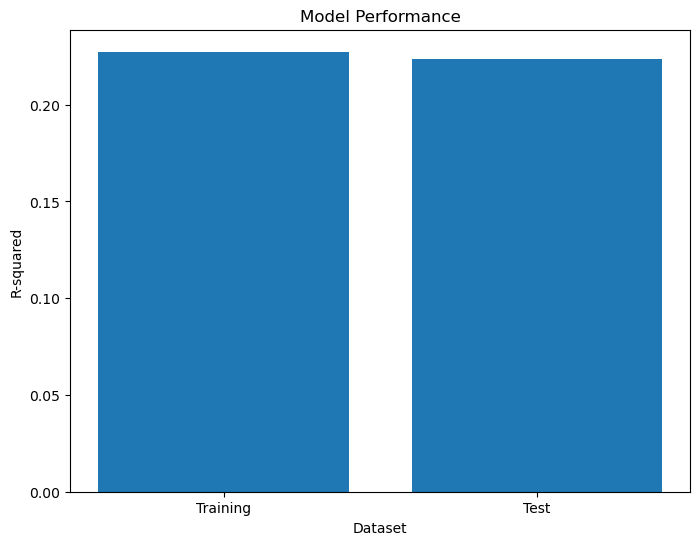

In [107]:
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Test'], [r2_train, r2_test])
plt.xlabel('Dataset')
plt.ylabel('R-squared')
plt.title('Model Performance')
plt.show()

#### Predictions vs. Real Values

In [108]:
predictions = Linear_model.predict(X_test)
predictions

array([ -583042.6599891 , 11386612.25557907,  1731883.64915499, ...,
        1942719.90692569,  -207324.35278107,  5805981.60783307])

In [109]:
Real_Values = np.array(y_test)
Real_Values

array([   25000, 25000000,  2800000, ...,   300000,   300000,   600000])

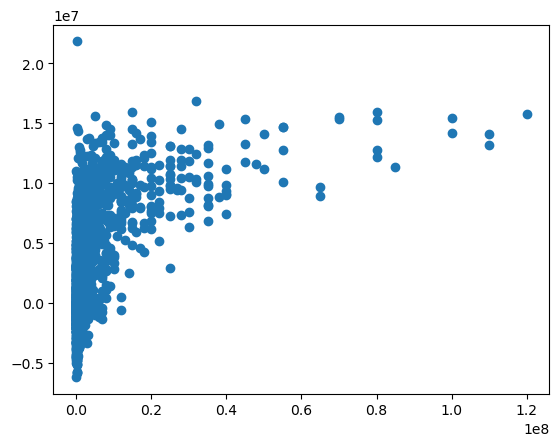

In [101]:
plt.scatter(Real_Values,predictions); 

/var/folders/lm/br8_4v_n6_n1dwk7cvxsmgxm0000gn/T/ipykernel_37315/1326397652.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




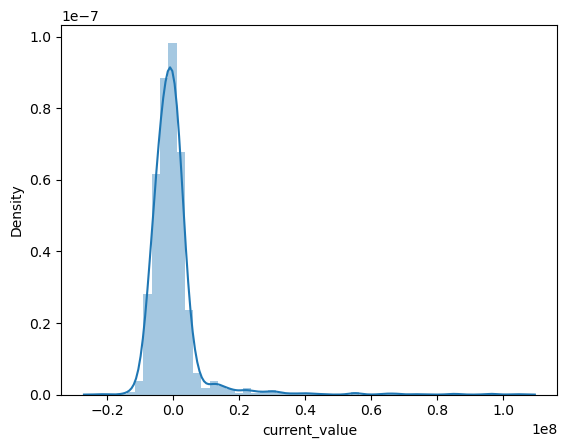

In [103]:
sns.distplot((y_test-predictions),bins=50)

In [106]:

train_r2 = r2_score(y_train, Linear_model.predict(X_train))
test_r2 = r2_score(y_test, Linear_model.predict(X_test))

print(f"Training R-squared: {train_r2:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Check for overfitting
if train_r2 > test_r2:
    print("The model is likely overfitting.")
else:
    print("The model does not seem to be overfitting.")

# Check for underfitting
if train_r2 < 0.5 and test_r2 < 0.5:
    print("The model is likely underfitting.")
else:
    print("The model does not seem to be underfitting.")

Training R-squared: 0.23
Test R-squared: 0.22
The model is likely overfitting.
The model is likely underfitting.


Limitations: Acknowledge any model limitations and suggest areas for improvement .


probabbly theres a problem in my understanding cuz the outputs doesnt make any sense